## PROJETO: Estratégia Anti-Crise - Análise Técnica usando médidas móveis em ALPA4.(+160% contra - 90% do Ativo)

# Desafio:
° Testa historicamente um modelo que compra ALPA4 baseado no cruzamento de médidas móveis


# Passo a passo:
Passo 1- Importar as bibliotecas.
Passo 2 - Pegar os dados do Yahoo Finance 
Passo 3 - Definir as janelas das médias móveis 
Passo 4 - Calcular as médias móveis
Passo 5 - Calcular o retorno diário da ação.
Passo 6 - Criar os sinais de compra ou venda.
Passo 7 - Calcular o retorno do Modelo.
Passo 8 - Calcular o retorno da ação e do ibovespa no mesmo período
Passo 9 - Criar o gráfico de retornos para observar o resultado da estratégia.


In [1]:
!pip install yfinance
!pip install mplcyberpunk

In [51]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import mplcyberpunk

plt.style.use("cyberpunk")

In [52]:
ticker = "ALPA4.SA"
dados = yf.download(ticker, start="2021-05-27", end = "2024-09-10")

[*********************100%***********************]  1 of 1 completed


In [53]:
dados.rename(columns={
    'Open': 'Abertura', 
    'High': 'Alta', 
    'Low': 'Baixa', 
    'Close': 'Fechamento', 
    'Adj Close': 'Fechamento Ajustado', 
    'Volume': 'Volume de Negociação'
}, inplace = True)

dados.head()

,Abertura,Alta,Baixa,Fechamento,Fechamento Ajustado,Volume de Negociação
Date,,,,,,
2021-05-27,44.505642,45.944530,44.016018,45.944530,45.438152,2510736
2021-05-28,46.014477,47.443375,45.125164,46.993721,46.475780,2855903
2021-05-31,46.933765,47.253521,45.824623,47.253521,46.732716,1352743
2021-06-01,47.253521,49.441830,46.594028,48.072887,47.543053,3357389
2021-06-02,48.342678,48.662434,47.233536,47.633228,47.108238,1531481


In [54]:
janela_rapida= 7
janela_devagar=40

In [55]:
dados["media_rapida"] = dados["Fechamento Ajustado"].rolling(window = janela_rapida).mean()
dados["media_devagar"] = dados["Fechamento Ajustado"].rolling(window = janela_devagar).mean()


In [56]:
dados["Retorno diario"] = dados["Fechamento Ajustado"].pct_change()
dados = dados.dropna()
dados

,Abertura,Alta,Baixa,Fechamento,Fechamento Ajustado,Volume de Negociação,media_rapida,media_devagar,Retorno diario
Date,,,,,,,,,
2021-07-23,52.749275,53.009075,52.039825,52.449509,51.871437,1268778,51.740146,49.516520,-0.003607
2021-07-26,52.969109,52.969109,51.670109,51.859962,51.288391,1088239,51.694970,49.662776,-0.011240
2021-07-27,51.700089,51.829987,50.590942,51.680103,51.110512,2018557,51.630030,49.778644,-0.003468
2021-07-28,51.620148,52.149738,50.980640,51.530216,50.962276,2620821,51.505797,49.884383,-0.002900
2021-07-29,51.410313,51.959885,50.880718,51.200474,50.636166,1792482,51.305330,49.961711,-0.006399
...,...,...,...,...,...,...,...,...,...
2024-09-03,7.630000,7.840000,7.560000,7.600000,7.600000,6196200,7.930000,8.475750,-0.003932
2024-09-04,7.650000,7.760000,7.600000,7.670000,7.670000,23248900,7.857143,8.431750,0.009211
2024-09-05,7.670000,7.720000,7.370000,7.590000,7.590000,9944000,7.761428,8.389250,-0.010430


In [58]:
dados.loc[:, "Comprado_ou_vendido"] = 0
dados

,Abertura,Alta,Baixa,Fechamento,Fechamento Ajustado,Volume de Negociação,media_rapida,media_devagar,Retorno diario,Comprado_ou_vendido
Date,,,,,,,,,,
2021-07-23,52.749275,53.009075,52.039825,52.449509,51.871437,1268778,51.740146,49.516520,-0.003607,0
2021-07-26,52.969109,52.969109,51.670109,51.859962,51.288391,1088239,51.694970,49.662776,-0.011240,0
2021-07-27,51.700089,51.829987,50.590942,51.680103,51.110512,2018557,51.630030,49.778644,-0.003468,0
2021-07-28,51.620148,52.149738,50.980640,51.530216,50.962276,2620821,51.505797,49.884383,-0.002900,0
2021-07-29,51.410313,51.959885,50.880718,51.200474,50.636166,1792482,51.305330,49.961711,-0.006399,0
...,...,...,...,...,...,...,...,...,...,...
2024-09-03,7.630000,7.840000,7.560000,7.600000,7.600000,6196200,7.930000,8.475750,-0.003932,0
2024-09-04,7.650000,7.760000,7.600000,7.670000,7.670000,23248900,7.857143,8.431750,0.009211,0
2024-09-05,7.670000,7.720000,7.370000,7.590000,7.590000,9944000,7.761428,8.389250,-0.010430,0


In [59]:
dados.loc[:, "Comprado_ou_vendido"] = np.where(dados["media_rapida"] > dados["media_devagar"], 1, -1)
dados

,Abertura,Alta,Baixa,Fechamento,Fechamento Ajustado,Volume de Negociação,media_rapida,media_devagar,Retorno diario,Comprado_ou_vendido
Date,,,,,,,,,,
2021-07-23,52.749275,53.009075,52.039825,52.449509,51.871437,1268778,51.740146,49.516520,-0.003607,1
2021-07-26,52.969109,52.969109,51.670109,51.859962,51.288391,1088239,51.694970,49.662776,-0.011240,1
2021-07-27,51.700089,51.829987,50.590942,51.680103,51.110512,2018557,51.630030,49.778644,-0.003468,1
2021-07-28,51.620148,52.149738,50.980640,51.530216,50.962276,2620821,51.505797,49.884383,-0.002900,1
2021-07-29,51.410313,51.959885,50.880718,51.200474,50.636166,1792482,51.305330,49.961711,-0.006399,1
...,...,...,...,...,...,...,...,...,...,...
2024-09-03,7.630000,7.840000,7.560000,7.600000,7.600000,6196200,7.930000,8.475750,-0.003932,-1
2024-09-04,7.650000,7.760000,7.600000,7.670000,7.670000,23248900,7.857143,8.431750,0.009211,-1
2024-09-05,7.670000,7.720000,7.370000,7.590000,7.590000,9944000,7.761428,8.389250,-0.010430,-1


In [61]:
dados.loc[:, "Comprado_ou_vendido"] = dados["Comprado_ou_vendido"].shift(1)
dados

,Abertura,Alta,Baixa,Fechamento,Fechamento Ajustado,Volume de Negociação,media_rapida,media_devagar,Retorno diario,Comprado_ou_vendido
Date,,,,,,,,,,
2021-07-23,52.749275,53.009075,52.039825,52.449509,51.871437,1268778,51.740146,49.516520,-0.003607,NaN
2021-07-26,52.969109,52.969109,51.670109,51.859962,51.288391,1088239,51.694970,49.662776,-0.011240,NaN
2021-07-27,51.700089,51.829987,50.590942,51.680103,51.110512,2018557,51.630030,49.778644,-0.003468,1.0
2021-07-28,51.620148,52.149738,50.980640,51.530216,50.962276,2620821,51.505797,49.884383,-0.002900,1.0
2021-07-29,51.410313,51.959885,50.880718,51.200474,50.636166,1792482,51.305330,49.961711,-0.006399,1.0
...,...,...,...,...,...,...,...,...,...,...
2024-09-03,7.630000,7.840000,7.560000,7.600000,7.600000,6196200,7.930000,8.475750,-0.003932,-1.0
2024-09-04,7.650000,7.760000,7.600000,7.670000,7.670000,23248900,7.857143,8.431750,0.009211,-1.0
2024-09-05,7.670000,7.720000,7.370000,7.590000,7.590000,9944000,7.761428,8.389250,-0.010430,-1.0


In [63]:
dados.loc[:, "Retorno modelo"] = dados["Retorno diario"] * dados["Comprado_ou_vendido"] 

In [65]:
dados.loc[:, "Retorno_acum_modelo"] =(1 + dados["Retorno modelo"]).cumprod() - 1  
dados

,Abertura,Alta,Baixa,Fechamento,Fechamento Ajustado,Volume de Negociação,media_rapida,media_devagar,Retorno diario,Comprado_ou_vendido,Retorno modelo,Retorno_acum_modelo
Date,,,,,,,,,,,,
2021-07-23,52.749275,53.009075,52.039825,52.449509,51.871437,1268778,51.740146,49.516520,-0.003607,NaN,NaN,NaN
2021-07-26,52.969109,52.969109,51.670109,51.859962,51.288391,1088239,51.694970,49.662776,-0.011240,NaN,NaN,NaN
2021-07-27,51.700089,51.829987,50.590942,51.680103,51.110512,2018557,51.630030,49.778644,-0.003468,1.0,-0.003468,-0.003468
2021-07-28,51.620148,52.149738,50.980640,51.530216,50.962276,2620821,51.505797,49.884383,-0.002900,1.0,-0.002900,-0.006358
2021-07-29,51.410313,51.959885,50.880718,51.200474,50.636166,1792482,51.305330,49.961711,-0.006399,1.0,-0.006399,-0.012717
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-03,7.630000,7.840000,7.560000,7.600000,7.600000,6196200,7.930000,8.475750,-0.003932,-1.0,0.003932,0.912689
2024-09-04,7.650000,7.760000,7.600000,7.670000,7.670000,23248900,7.857143,8.431750,0.009211,-1.0,-0.009211,0.895072
2024-09-05,7.670000,7.720000,7.370000,7.590000,7.590000,9944000,7.761428,8.389250,-0.010430,-1.0,0.010430,0.914838


In [67]:
dados.loc[:, "Retorno_acum_acao"] =(1 + dados["Retorno diario"]).cumprod() - 1 

In [69]:
ibov =yf.download("^BVSP", start= dados.index[0], end="2024-09-10")["Close"]
dados.loc[:, "retorno_ibov"] = ibov.pct_change().values
dados

[*********************100%***********************]  1 of 1 completed


,Abertura,Alta,Baixa,Fechamento,Fechamento Ajustado,Volume de Negociação,media_rapida,media_devagar,Retorno diario,Comprado_ou_vendido,Retorno modelo,Retorno_acum_modelo,Retorno_acum_acao,retorno_ibov
Date,,,,,,,,,,,,,,
2021-07-23,52.749275,53.009075,52.039825,52.449509,51.871437,1268778,51.740146,49.516520,-0.003607,NaN,NaN,NaN,-0.003607,NaN
2021-07-26,52.969109,52.969109,51.670109,51.859962,51.288391,1088239,51.694970,49.662776,-0.011240,NaN,NaN,NaN,-0.014806,0.007605
2021-07-27,51.700089,51.829987,50.590942,51.680103,51.110512,2018557,51.630030,49.778644,-0.003468,1.0,-0.003468,-0.003468,-0.018223,-0.011047
2021-07-28,51.620148,52.149738,50.980640,51.530216,50.962276,2620821,51.505797,49.884383,-0.002900,1.0,-0.002900,-0.006358,-0.021071,0.013434
2021-07-29,51.410313,51.959885,50.880718,51.200474,50.636166,1792482,51.305330,49.961711,-0.006399,1.0,-0.006399,-0.012717,-0.027335,-0.004838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-03,7.630000,7.840000,7.560000,7.600000,7.600000,6196200,7.930000,8.475750,-0.003932,-1.0,0.003932,0.912689,-0.854012,-0.004653
2024-09-04,7.650000,7.760000,7.600000,7.670000,7.670000,23248900,7.857143,8.431750,0.009211,-1.0,-0.009211,0.895072,-0.852668,0.013085
2024-09-05,7.670000,7.720000,7.370000,7.590000,7.590000,9944000,7.761428,8.389250,-0.010430,-1.0,0.010430,0.914838,-0.854204,0.002873


In [70]:
dados.loc[:, "Retorno_acum_ibov"] =(1 + dados["retorno_ibov"]).cumprod() - 1 

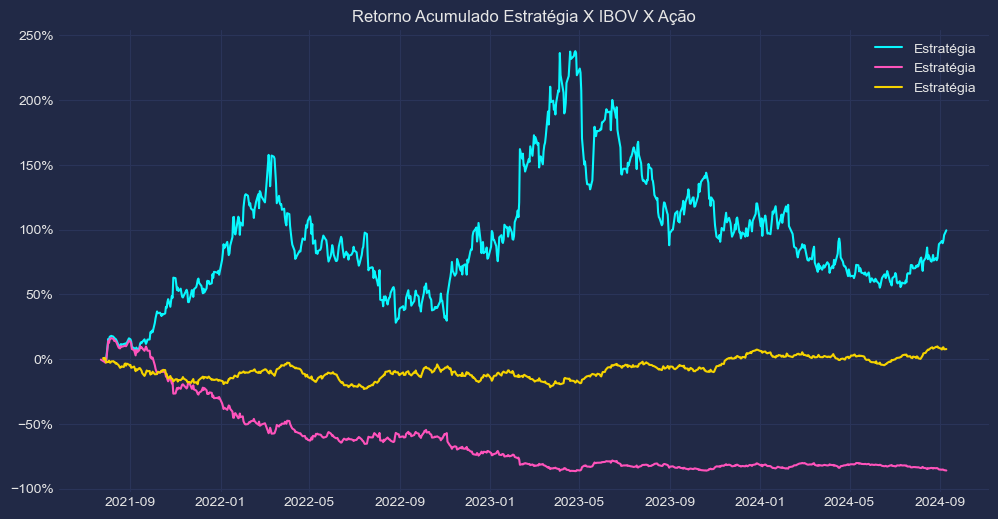

In [71]:
plt.figure(figsize=(12,6))
plt.plot(dados["Retorno_acum_modelo"], label = "Estratégia")
plt.plot(dados["Retorno_acum_acao"], label = "Estratégia")
plt.plot(dados["Retorno_acum_ibov"], label = "Estratégia")
plt.legend(loc= 'best')
plt.title("Retorno Acumulado Estratégia X IBOV X Ação")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.show()


In [72]:
dados

,Abertura,Alta,Baixa,Fechamento,Fechamento Ajustado,Volume de Negociação,media_rapida,media_devagar,Retorno diario,Comprado_ou_vendido,Retorno modelo,Retorno_acum_modelo,Retorno_acum_acao,retorno_ibov,Retorno_acum_ibov
Date,,,,,,,,,,,,,,,
2021-07-23,52.749275,53.009075,52.039825,52.449509,51.871437,1268778,51.740146,49.516520,-0.003607,NaN,NaN,NaN,-0.003607,NaN,NaN
2021-07-26,52.969109,52.969109,51.670109,51.859962,51.288391,1088239,51.694970,49.662776,-0.011240,NaN,NaN,NaN,-0.014806,0.007605,0.007605
2021-07-27,51.700089,51.829987,50.590942,51.680103,51.110512,2018557,51.630030,49.778644,-0.003468,1.0,-0.003468,-0.003468,-0.018223,-0.011047,-0.003527
2021-07-28,51.620148,52.149738,50.980640,51.530216,50.962276,2620821,51.505797,49.884383,-0.002900,1.0,-0.002900,-0.006358,-0.021071,0.013434,0.009860
2021-07-29,51.410313,51.959885,50.880718,51.200474,50.636166,1792482,51.305330,49.961711,-0.006399,1.0,-0.006399,-0.012717,-0.027335,-0.004838,0.004974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-03,7.630000,7.840000,7.560000,7.600000,7.600000,6196200,7.930000,8.475750,-0.003932,-1.0,0.003932,0.912689,-0.854012,-0.004653,0.074368
2024-09-04,7.650000,7.760000,7.600000,7.670000,7.670000,23248900,7.857143,8.431750,0.009211,-1.0,-0.009211,0.895072,-0.852668,0.013085,0.088427
2024-09-05,7.670000,7.720000,7.370000,7.590000,7.590000,9944000,7.761428,8.389250,-0.010430,-1.0,0.010430,0.914838,-0.854204,0.002873,0.091553
